## Imports:

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import matplotlib.pyplot as plt

## Data Preparation:

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


## Try to build your own convolutional neural network in keras. Use 2D convolutional and max pooling layers for the first part of the network, use two of each. Use a flatten layer and a dropout layer before passing it to dense layer with softmax as output. Here is some documentation on these things that might help:

* https://keras.io/api/layers/core_layers/input/
* https://keras.io/api/layers/convolution_layers/convolution2d/
* https://keras.io/api/layers/pooling_layers/max_pooling2d/
* https://keras.io/api/layers/reshaping_layers/flatten/


In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'), #relu removes negative numbers
        layers.MaxPooling2D((2,2)), #max pooling: subsampling
        layers.Conv2D(16, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dropout_1 (Dropout)         (None, 400)              

## Use the keras compile and fit functions to prepare and train your model.

* https://keras.io/api/models/model_training_apis/

In [8]:
# Compile and fit here
opt = keras.optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = opt, loss= 'categorical_crossentropy', metrics = ["accuracy"])

model.fit(
    x_train, y_train,
    epochs=15, batch_size = 256,
    validation_split = 0.1)

Epoch 1/15
211/211 [==============================] - 26s 121ms/step - loss: 2.2062 - accuracy: 0.2225 - val_loss: 2.1761 - val_accuracy: 0.3180
Epoch 2/15
211/211 [==============================] - 26s 122ms/step - loss: 2.1824 - accuracy: 0.2377 - val_loss: 2.1439 - val_accuracy: 0.3665
Epoch 3/15
211/211 [==============================] - 26s 122ms/step - loss: 2.1544 - accuracy: 0.2565 - val_loss: 2.1042 - val_accuracy: 0.4213
Epoch 4/15
211/211 [==============================] - 26s 122ms/step - loss: 2.1188 - accuracy: 0.2798 - val_loss: 2.0540 - val_accuracy: 0.4908
Epoch 5/15
211/211 [==============================] - 27s 128ms/step - loss: 2.0765 - accuracy: 0.3044 - val_loss: 1.9916 - val_accuracy: 0.5588
Epoch 6/15
211/211 [==============================] - 26s 123ms/step - loss: 2.0205 - accuracy: 0.3339 - val_loss: 1.9135 - val_accuracy: 0.6212
Epoch 7/15
211/211 [==============================] - 25s 117ms/step - loss: 1.9565 - accuracy: 0.3637 - val_loss: 1.8188 - val_ac

## Use the keras Model evaluate function with our test data to evaluate its preformance. Print the test loss and test accuracy of the model.

In [9]:
#Evaluate here

model.evaluate(x_test, y_test, verbose=0)


[0.9500325322151184, 0.8170999884605408]

## Evaluating Predictions

### Change the image_index to see its predictions for other images!

1/1 [==============================] - 0s 95ms/step
Model prediction: 2


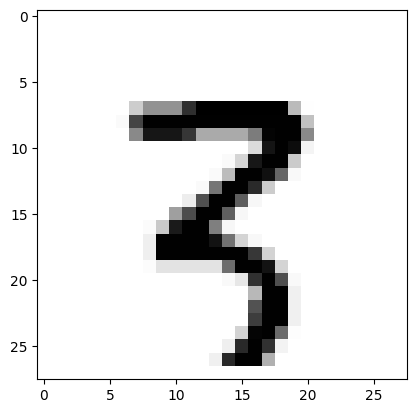

In [10]:
image_index = 1204
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(np.array( [x_test[image_index],] ))
print("Model prediction:",pred.argmax())

## Go back through the model code from the earlier sections. Modify the hyperparameters (things like the learning rate, activation function, number of epochs, number of nodes, etc).Try different dropout rates. Addidtionally, add the 'momentum' parameter to our SGD optimizer to see how that effects the preformance.
